#  WRANGLE AND ANALYZE DATA ; WeRateDogs

## Table of Contents


1. [Data Gathering](#1.-Data-Gathering)
2. [Data Assessing](#2.-Data-Assessing)
3. [ Identification of quality and tidyness issues](#3.-Identification-of-quality-and-tidyness-issues)
4. [Data Cleaning](#4.-Data-Cleaning)
5. [Storing , Analysing and Visualizing the data](#5.-Storing-,-Analysing-and-Visualizing-the-data)

## 1. Data Gathering

 ### IMPORTING USEFUL LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import json
import requests
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

### Importing data from different sources

In [2]:
# importing the fist dataset manually which is in csv format
arc_data = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# programaticaly  download the second data which is in tsv format
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

#saving the tsv file
with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

In [4]:
# importing the image data into pandas
image_data =pd.read_csv('image-predictions.tsv',sep ='\t')

In [5]:
# opening the json file and reading it line by line into pandas datadrame
df = []
with open('tweet-json.txt', 'r') as file:
    for line in file:
        data = json.loads(line)
        df.append(data)
tweets_data = pd.DataFrame(df,columns = ['id','retweet_count','favorite_count'])
        


## 2. Data Assessing

In [6]:
# to check the firt 5 entry in the dataframe
arc_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
# to check the basic information of the dataframe
arc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

this dataframe has 2356 entries and 17 columns with different datatypes such as integer,float and object.some columns as missing values such as in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp and expanded_urls

In [8]:
# to check the statistical summary of the dataset
arc_data.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [9]:
image_data.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [10]:
image_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
image_data.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [12]:
tweets_data.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [13]:
tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


## 3. Identification of quality and tidyness issues

### Tidyness issues
1. doggo,floofer, pupper,puppo column should be conbine in a single column 
2. the image data and the tweet data should have being combined together with the archive data


###  Quality issues 
1. high amount of missing values in some colums suchn as; in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp
2. expanded_url,column not really important for this project
3. the empty values stored as none in name column should be replaced with NAN
4. timestamp datatype is stored as object instead of  datetime
5. in p1,p2,p3 columns,some description are with underscore while others are not
6. some Column headers are not discriptive enough
7. under the name column,some values appear in lower case and it seems not to be real name e.g a,one,an,getting,the,trip
8. some rating_numerator are in decimal 
9. some text are retweet

## 4. Data Cleaning

In [14]:
# duplicating the dataframes
arc_data_clean = arc_data.copy()
image_data_clean = image_data.copy()
tweets_data_clean = tweets_data.copy()


### Tidyness Issues 1 ; doggo,floofer, pupper,puppo column should be conbine in a single column

### Define

#### The dogo,floofer,pupper and puppo will be combine in a column

### Code

In [15]:
# this code merge the three dog column into 1
breed_type = ['doggo','floofer','pupper','puppo']

arc_data_clean[breed_type] = arc_data_clean[breed_type].replace('None', np.nan)
def join_all(x):
    return ', '.join(x.dropna().astype(str))

arc_data_clean['breed_type'] = arc_data_clean[breed_type].apply(join_all, axis=1)

arc_data_clean['breed_type']= arc_data_clean['breed_type'].replace('', np.nan)


In [16]:
# drop the columns that were use in merging but are no longer necessary
arc_data_clean.drop(columns=['doggo','floofer','pupper','puppo'],inplace= True)

### Test

In [17]:
# this output the value count of the new merge column 
arc_data_clean['breed_type'].value_counts()

pupper            245
doggo              83
puppo              29
doggo, pupper      12
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: breed_type, dtype: int64

In [18]:
arc_data_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,breed_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


### Tidyness Issues 2 ; The image data and the tweet data should have being combined together with the archive data

### Define

#### The three dataset will be merge into 1 called the master Archive

### Code

In [19]:
# merge the archive and the tweets data into twitter_archieve
twitter_archive= pd.merge(left=arc_data_clean, right=tweets_data_clean, left_on='tweet_id', right_on='id', how='inner')

In [20]:
# twitter_archive merge with image data to get the master_data
master_archive= twitter_archive.merge(image_data_clean, on='tweet_id', how='inner')

In [21]:
master_archive.drop(columns=['id'],inplace = True)

### Test

In [22]:
master_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [23]:
master_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  breed_type                  320 n

In [24]:
master_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,2.073000e+03,2.300000e+01,2.300000e+01,7.900000e+01,7.900000e+01,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2.073000e+03,2.073000e+03
mean,7.383634e+17,6.978112e+17,4.196984e+09,7.663364e+17,9.967874e+15,12.265798,10.511819,2976.089243,8556.718283,1.203570,0.594532,1.346665e-01,6.034005e-02
std,6.780118e+16,4.359384e+16,0.000000e+00,5.882530e+16,8.859637e+16,40.699924,7.180517,5054.897526,12098.640994,0.561856,0.271234,1.006830e-01,5.092769e-02
min,6.660209e+17,6.671522e+17,4.196984e+09,6.675094e+17,7.832140e+05,0.000000,2.000000,16.000000,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764706e+17,6.732411e+17,4.196984e+09,7.124037e+17,4.196984e+09,10.000000,10.000000,634.000000,1674.000000,1.000000,0.364095,5.390140e-02,1.619920e-02
50%,7.119681e+17,6.757073e+17,4.196984e+09,7.798343e+17,4.196984e+09,11.000000,10.000000,1408.000000,3864.000000,1.000000,0.588230,1.186220e-01,4.947150e-02
75%,7.931959e+17,7.031489e+17,4.196984e+09,8.068680e+17,4.196984e+09,12.000000,10.000000,3443.000000,10937.000000,1.000000,0.843911,1.955730e-01,9.193000e-02
max,8.924206e+17,8.558181e+17,4.196984e+09,8.768508e+17,7.874618e+17,1776.000000,170.000000,79515.000000,132810.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


### Cleaning Quality Issues 1;high amount of missing values in some columns

### Define

#### columns with high amount of missing values will be drop in other not to affect our analysis

### Code

In [25]:
# to check if the in_reply_to_status_id columns if it contains value or not
master_archive[master_archive['in_reply_to_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
123,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,...,1,Lakeland_terrier,0.275242,True,Airedale,0.190569,True,teddy,0.102595,False
152,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,...,1,Old_English_sheepdog,0.798481,True,Tibetan_terrier,0.060602,True,standard_poodle,0.040722,True
201,844979544864018432,7.590995e+17,4.196984e+09,2017-03-23 18:29:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",PUPDATE: I'm proud to announce that Toby is 23...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/844979544...,...,3,tennis_ball,0.999281,False,racket,0.000370,False,Shetland_sheepdog,0.000132,True
457,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,...,1,Labrador_retriever,0.897162,True,beagle,0.016895,True,Rhodesian_ridgeback,0.012061,True
832,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,...,1,traffic_light,0.470708,False,fountain,0.199776,False,space_shuttle,0.064807,False
834,746818907684614144,6.914169e+17,4.196984e+09,2016-06-25 21:34:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys... Dog Jesus 2.0\n13/10 buoyant af https:...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746818907...,...,1,dingo,0.175518,False,timber_wolf,0.133647,False,Ibizan_hound,0.101537,True
931,729838605770891264,7.291135e+17,4.196984e+09,2016-05-10 01:00:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Challenge completed"" \n(pupgraded to 12/10) h...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/729838605...,...,1,stone_wall,0.758218,False,patio,0.074205,False,prison,0.013826,False
1112,705786532653883392,7.032559e+17,4.196984e+09,2016-03-04 16:06:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Seriously, add us 🐶 11/10 for sad wet pupper h...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/705786532...,...,1,web_site,0.550294,False,Labrador_retriever,0.148496,True,golden_retriever,0.148482,True
1121,704871453724954624,6.671522e+17,4.196984e+09,2016-03-02 03:30:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I found a forest Pipsy. 12/10 https://t.co/mIQ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704871453...,...,1,Norfolk_terrier,0.689504,True,soft-coated_wheaten_terrier,0.101480,True,Norwich_terrier,0.055778,True
1136,703425003149250560,7.030419e+17,4.196984e+09,2016-02-27 03:42:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Really guys? Again? I know this is a rare Alba...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703425003...,...,1,miniature_pinscher,0.292866,True,sleeping_bag,0.142122,False,Italian_greyhound,0.070849,True


the output above shows the in_reply_to_status_id has values which means it has retweet and since we are to gather only tweets not retweet the column will be dropped

In [26]:
#to check for percentage of missing values in the data
master_archive.isnull().sum()/len(master_archive)*100

tweet_id                       0.000000
in_reply_to_status_id         98.890497
in_reply_to_user_id           98.890497
timestamp                      0.000000
source                         0.000000
text                           0.000000
retweeted_status_id           96.189098
retweeted_status_user_id      96.189098
retweeted_status_timestamp    96.189098
expanded_urls                  0.000000
rating_numerator               0.000000
rating_denominator             0.000000
name                           0.000000
breed_type                    84.563435
retweet_count                  0.000000
favorite_count                 0.000000
jpg_url                        0.000000
img_num                        0.000000
p1                             0.000000
p1_conf                        0.000000
p1_dog                         0.000000
p2                             0.000000
p2_conf                        0.000000
p2_dog                         0.000000
p3                             0.000000


In [27]:
# dropping the columns with null value percentage higher than 90%
master_archive.drop(columns=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], inplace = True)

### Test


In [28]:
# checking the info after the columns has being dropped
master_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2073 non-null   int64  
 1   timestamp           2073 non-null   object 
 2   source              2073 non-null   object 
 3   text                2073 non-null   object 
 4   expanded_urls       2073 non-null   object 
 5   rating_numerator    2073 non-null   int64  
 6   rating_denominator  2073 non-null   int64  
 7   name                2073 non-null   object 
 8   breed_type          320 non-null    object 
 9   retweet_count       2073 non-null   int64  
 10  favorite_count      2073 non-null   int64  
 11  jpg_url             2073 non-null   object 
 12  img_num             2073 non-null   int64  
 13  p1                  2073 non-null   object 
 14  p1_conf             2073 non-null   float64
 15  p1_dog              2073 non-null   bool   
 16  p2    


### Cleaning Quality Issues 2;expanded_url column not really important

### Define 

#### expanded_urls column will be dropped

### Code

In [29]:
#  drop the expanded_urlcolumn
master_archive.drop(columns=['expanded_urls'],inplace = True)

### Test

In [30]:
master_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2073 non-null   int64  
 1   timestamp           2073 non-null   object 
 2   source              2073 non-null   object 
 3   text                2073 non-null   object 
 4   rating_numerator    2073 non-null   int64  
 5   rating_denominator  2073 non-null   int64  
 6   name                2073 non-null   object 
 7   breed_type          320 non-null    object 
 8   retweet_count       2073 non-null   int64  
 9   favorite_count      2073 non-null   int64  
 10  jpg_url             2073 non-null   object 
 11  img_num             2073 non-null   int64  
 12  p1                  2073 non-null   object 
 13  p1_conf             2073 non-null   float64
 14  p1_dog              2073 non-null   bool   
 15  p2                  2073 non-null   object 
 16  p2_con

### Cleaning Quality Issues 3; The empty values stored as none in name column should be replaced with NAN

 ### Define

#### Entries stored as None will be replaced with NAN

### Code

In [31]:
master_archive['name'] =master_archive['name'].replace('None', np.nan)

### Test

In [32]:
master_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2073 non-null   int64  
 1   timestamp           2073 non-null   object 
 2   source              2073 non-null   object 
 3   text                2073 non-null   object 
 4   rating_numerator    2073 non-null   int64  
 5   rating_denominator  2073 non-null   int64  
 6   name                1496 non-null   object 
 7   breed_type          320 non-null    object 
 8   retweet_count       2073 non-null   int64  
 9   favorite_count      2073 non-null   int64  
 10  jpg_url             2073 non-null   object 
 11  img_num             2073 non-null   int64  
 12  p1                  2073 non-null   object 
 13  p1_conf             2073 non-null   float64
 14  p1_dog              2073 non-null   bool   
 15  p2                  2073 non-null   object 
 16  p2_con

### Cleaning Quality Issues 4;timestamp datatype is stored as object instead of datetime

### Define

Timestamp data will be changed fom object to datetime

### Code

In [33]:
# changing timestamp datatype which is object to datetime
master_archive["timestamp"] =master_archive["timestamp"].astype('datetime64[ns]')

### Test

In [34]:
# check of the datatype has effectively changed
master_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2073 non-null   int64         
 1   timestamp           2073 non-null   datetime64[ns]
 2   source              2073 non-null   object        
 3   text                2073 non-null   object        
 4   rating_numerator    2073 non-null   int64         
 5   rating_denominator  2073 non-null   int64         
 6   name                1496 non-null   object        
 7   breed_type          320 non-null    object        
 8   retweet_count       2073 non-null   int64         
 9   favorite_count      2073 non-null   int64         
 10  jpg_url             2073 non-null   object        
 11  img_num             2073 non-null   int64         
 12  p1                  2073 non-null   object        
 13  p1_conf             2073 non-null   float64     

 ###  Cleaning Quality Issues 5 ; in p1,p2,p3 columns,some description are with underscore while others are not

### Define

#### The underscore will be removed so all description will be in same format

### Code

In [35]:
# replace the undescore with space
master_archive['p1'] = master_archive['p1'].str.replace('_', ' ')
master_archive['p2'] = master_archive['p2'].str.replace('_', ' ')
master_archive['p3'] = master_archive['p3'].str.replace('_', ' ')

### Test

In [36]:
master_archive.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,breed_type,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,8853,39467,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,6514,33819,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,4328,25461,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,8964,42908,...,1,paper towel,0.170278,False,Labrador retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,9774,41048,...,2,basset,0.555712,True,English springer,0.225770,True,German short-haired pointer,0.175219,True


### Cleaning Quality Issues 6 ; some Column headers are not discriptive enough

### Define 


#### The less descriptive column will be modify to make more sense

### Code

In [37]:
# renaming the affected columns
master_archive = master_archive.rename(columns = {'img_num':'image_number',
                                                  'p1': 'prediction_1',
                                                  'p1_conf':'prediction_1_confidence',
                                                  'p1_dog':'prediction_1_dog',
                                                  'p2': 'prediction_2',
                                                  'p2_conf':'prediction_2_confidence',
                                                  'p2_dog':'prediction_2_dog',
                                                  'p3': 'prediction_3',
                                                  'p3_conf':'prediction_3_confidence',
                                                  'p3_dog':'prediction_3_dog'})

### Test

In [38]:
# to check if the column headers have change
master_archive.head(2)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,breed_type,retweet_count,favorite_count,...,image_number,prediction_1,prediction_1_confidence,prediction_1_dog,prediction_2,prediction_2_confidence,prediction_2_dog,prediction_3,prediction_3_confidence,prediction_3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,8853,39467,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,6514,33819,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


### Cleaning Quality Issues 7 ; under the name column,some values appear in lower case and it seems not to be real name

### Define


#### Any Name in lower case will be changed to NAN


### Code

In [39]:
# this output subset of names that are in lowercase
lower_names = master_archive[master_archive['name'].str.islower() == True] 
lower_names

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,breed_type,retweet_count,favorite_count,...,image_number,prediction_1,prediction_1_confidence,prediction_1_dog,prediction_2,prediction_2_confidence,prediction_2_dog,prediction_3,prediction_3_confidence,prediction_3_dog
21,887517139158093824,2017-07-19 03:39:09,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,14,10,such,NaN,12082,46959,...,1,limousine,0.130432,False,tow truck,0.029175,False,shopping cart,0.026321,False
50,881536004380872706,2017-07-02 15:32:16,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,14,10,a,pupper,16570,50199,...,1,Samoyed,0.281463,True,Angora,0.272066,False,Persian cat,0.114854,False
141,859196978902773760,2017-05-02 00:04:57,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,12,10,quite,NaN,25661,75193,...,1,Angora,0.224218,False,malamute,0.216163,True,Persian cat,0.128383,False
155,855459453768019968,2017-04-21 16:33:22,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",12,10,quite,NaN,8987,31657,...,2,Blenheim spaniel,0.389513,True,Pekinese,0.188220,True,Japanese spaniel,0.082628,True
293,828650029636317184,2017-02-06 17:02:17,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",14,10,one,NaN,1544,10467,...,1,golden retriever,0.649209,True,Chesapeake Bay retriever,0.198560,True,vizsla,0.056200,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2066,666051853826850816,2015-11-16 00:35:11,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,2,10,an,NaN,879,1253,...,1,box turtle,0.933012,False,mud turtle,0.045885,False,terrapin,0.017885,False
2067,666050758794694657,2015-11-16 00:30:50,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,10,10,a,NaN,60,136,...,1,Bernese mountain dog,0.651137,True,English springer,0.263788,True,Greater Swiss Mountain dog,0.016199,True
2069,666044226329800704,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,6,10,a,NaN,147,311,...,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
2070,666033412701032449,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,9,10,a,NaN,47,128,...,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [40]:
# changing the names in lower case to NAN
master_archive[master_archive['name'].str.islower() == True]='NAN'

### Test

In [41]:
# recheck if there is still any name in lowercase
master_archive[master_archive['name'].str.islower() == True] 

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,breed_type,retweet_count,favorite_count,...,image_number,prediction_1,prediction_1_confidence,prediction_1_dog,prediction_2,prediction_2_confidence,prediction_2_dog,prediction_3,prediction_3_confidence,prediction_3_dog


### Define

####  some rating_numerator are in decimal 

### Code

In [42]:
# configuration to show full text
pd.set_option('display.max_colwidth', -1)
# it filters out tweet that have decimal point
master_archive[master_archive.text.str.extract(r'(\d+\.\d+)', expand=False).notnull()].text

40      This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948                         
208     This is Tycho. She just had new wheels installed. About to do a zoom. 0-60 in 2.4 seconds. 13/10 inspirational as h*ck https://t.co/DKwp2ByMsL                   
558     This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS                                 
614     This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
834     Guys... Dog Jesus 2.0\n13/10 buoyant af https://t.co/CuNA7OwfKQ                                                                                                  
1082    This is Farfle. He lost his back legs during the Battle of Gettysburg. Goes 0-60 in 4.3 seconds (damn) 12/10 hero af https://t.co/NiQQWzIzzq  

In [43]:
### this code below will only extract the rating_numerator that doesnt have decimal
master_archive['rating_numerator'] = master_archive['text'].str.extract('(\d+\.*\d*\/\d+)', expand=False).str.split('/').str[0].str.split('.').str[0]

### Cleaning quality issue 9: some text are retweet

#### Define

#### Removing retweets,any tweets that starts with "RT" means retweets, so we need to remove them

#### Code

In [44]:
### Cleaning quality issue 10: some text are retweet

In [45]:
master_archive.loc[master_archive['text'].str.startswith('RT') != False]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,breed_type,retweet_count,favorite_count,...,image_number,prediction_1,prediction_1_confidence,prediction_1_dog,prediction_2,prediction_2_confidence,prediction_2_dog,prediction_3,prediction_3_confidence,prediction_3_dog
32,885311592912609280,2017-07-13 01:35:06,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,13,10,Lilly,NaN,19297,0,...,1,Labrador retriever,0.908703,True,seat belt,0.057091,False,pug,0.011933,True
67,877611172832227328,2017-06-21 19:36:23,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @rachel2195: @dog_rates the boyfriend and his soaking wet pupper h*cking love his new hat 14/10 https://t.co/dJx4Gzc50G,14,10,NaN,pupper,83,0,...,1,Irish setter,0.364729,True,golden retriever,0.202907,True,Irish terrier,0.107473,True
81,873697596434513921,2017-06-11 00:25:14,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Walter. He won't start hydrotherapy without his favorite floatie. 14/10 keep it pup Walter https://t.co/r28jFx9uyF,14,10,Walter,NaN,12518,0,...,1,laptop,0.153718,False,French bulldog,0.099984,True,printer,0.07713,False
109,867072653475098625,2017-05-23 17:40:04,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @rachaeleasler: these @dog_rates hats are 13/10 bean approved https://t.co/nRCdq4g9gG,13,10,NaN,NaN,135,0,...,1,Blenheim spaniel,0.352946,True,papillon,0.211766,True,Pekinese,0.112952,True
129,861769973181624320,2017-05-09 02:29:07,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: ""Good afternoon class today we're going to learn what makes a good boy so good"" 13/10 https://t.co/f1h2Fsalv9",13,10,NaN,NaN,37911,0,...,2,Arabian camel,0.366248,False,house finch,0.209852,False,cocker spaniel,0.046403,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,752309394570878976,2016-07-11 01:11:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Everyone needs to watch this. 13/10 https://t.co/Bb3xnpsWBC,13,10,NaN,NaN,18963,0,...,1,upright,0.303415,False,golden retriever,0.181351,True,Brittany spaniel,0.162084,True
1035,711998809858043904,2016-03-21 19:31:59,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @twitter: @dog_rates Awesome Tweet! 12/10. Would Retweet. #LoveTwitter https://t.co/j6FQGhxYuN,12,10,NaN,NaN,138,0,...,1,comic book,0.105171,False,kuvasz,0.059895,True,book jacket,0.046638,False
1587,675489971617296384,2015-12-12 01:38:53,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT until we find this dog. Clearly a cool dog (front leg relaxed out window). Looks to be a superb driver. 10/10 https://t.co/MnTrKaQ8Wn,10,10,NaN,NaN,672,1406,...,1,West Highland white terrier,0.139613,True,seat belt,0.118647,False,Old English sheepdog,0.093952,True
1977,667550904950915073,2015-11-20 03:51:52,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>","RT @dogratingrating: Exceptional talent. Original humor. Cutting edge, Nova Scotian comedian. 12/10 https://t.co/uarnTjBeVA",12,10,NaN,NaN,37,0,...,1,web site,0.999335,False,vizsla,0.000081,True,collie,0.000069,True


In [46]:
master_archive = master_archive.loc[master_archive['text'].str.startswith('RT') == False]

### Test

In [47]:
master_archive

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,breed_type,retweet_count,favorite_count,...,image_number,prediction_1,prediction_1_confidence,prediction_1_dog,prediction_2,prediction_2_confidence,prediction_2_dog,prediction_3,prediction_3_confidence,prediction_3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,NaN,8853,39467,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,NaN,6514,33819,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,NaN,4328,25461,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,NaN,8964,42908,...,1,paper towel,0.170278,False,Labrador retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,NaN,9774,41048,...,2,basset,0.555712,True,English springer,0.22577,True,German short-haired pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,666049248165822465,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,5,10,NaN,NaN,41,111,...,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
2069,NAN,NaT,NAN,NAN,NaN,NAN,NAN,NAN,NAN,NAN,...,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN
2070,NAN,NaT,NAN,NAN,NaN,NAN,NAN,NAN,NAN,NAN,...,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN
2071,NAN,NaT,NAN,NAN,NaN,NAN,NAN,NAN,NAN,NAN,...,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN


## 5. Storing , Analysing and Visualizing the data

### Saving the cleaned data in csv format

In [48]:
# saving th clean dataframe in a csv file
master_archive.to_csv('twitter_archive_master.csv', index=False)

### Analysis and Visualization

#### Question 1: the source with highest amount of users

In [49]:
sources_no = master_archive['source'].value_counts()
sources_no

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1860
NAN                                                                                    100 
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     25  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    10  
Name: source, dtype: int64

Twitter for iPhone( i.e iPhone) has the highest users

#### Question 2: The most frequent image number

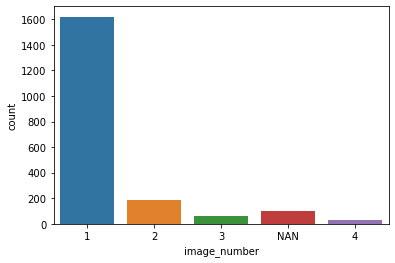

In [50]:
sns.countplot(master_archive.image_number);

image 1 is the image with the highest count

#### Question 3: The most common dog breed

In [51]:
master_archive['breed_type'].dropna().value_counts()

pupper            194
NAN               100
doggo             61 
puppo             22 
doggo, pupper     8  
floofer           7  
doggo, puppo      1  
doggo, floofer    1  
Name: breed_type, dtype: int64

#### Question 4: The most popular dog by first prediction

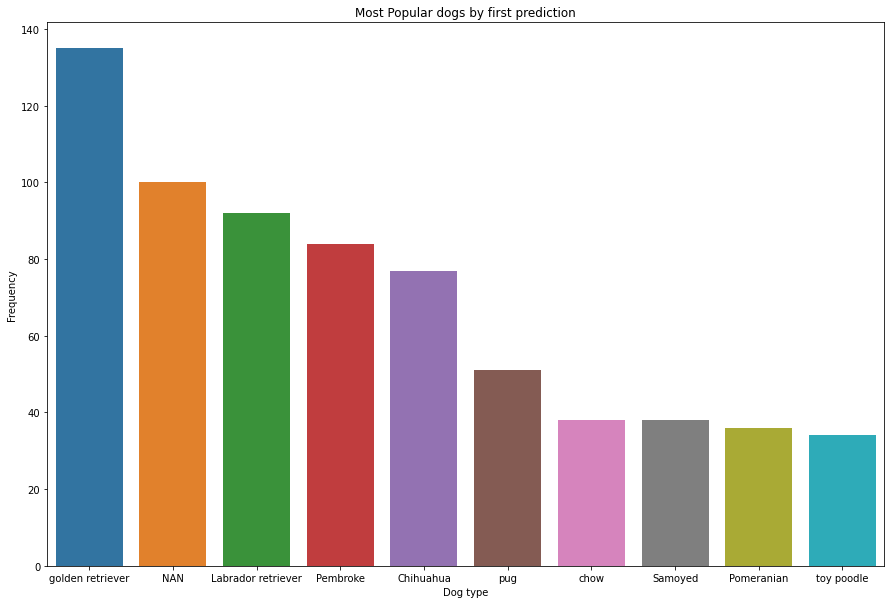

In [52]:
plt.figure(figsize = [15,10])
sns.countplot(data = master_archive, x =master_archive.prediction_1, order=master_archive.prediction_1.value_counts().iloc[:10].index)
plt.title("Most Popular dogs by first prediction")
plt.ylabel("Frequency")
plt.xlabel("Dog type");